## **Rock Classification**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df_aggregate_rock = pd.read_excel('/content/aggregateRockData.xlsx',names=['label'],usecols=[1],nrows=480,header=None)
df_aggregate_rock

,label
0,1
1,1
2,1
3,1
4,1
...,...
475,3
476,3
477,3
478,3


In [ ]:
df_aggregate_rock.shape

(480, 1)

In [ ]:
df_feature_presence = pd.read_csv('/content/feature_presence540.txt',
                                  delim_whitespace=True,
                                  header=None,
                                  usecols=[2] + list(range(3, 14)),
                                  nrows=480)

In [ ]:
df_feature_presence

,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
475,12,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30
476,13,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35
477,14,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20
478,15,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20


In [ ]:
df_feature_presence.shape

(480, 12)

In [ ]:
df_feature_presence.columns = ["token_number"] + [f"feature_{i}" for i in range(1, 12)]



In [ ]:

combined_data = pd.concat([df_aggregate_rock,df_feature_presence ], axis=1)



In [ ]:
df = combined_data.copy()

In [ ]:
df.head()

,label,token_number,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
0,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


1. All features have 480 data points. The means are relatively small, and the standard deviations vary across features. Some features have higher variability (e.g., feature_6, feature_7), while others have lower variability (e.g., feature_10). Many features have a minimum value of 0 and a maximum value of 1. The quartiles (25%, 50%, and 75%) show that many features have a large proportion of zeros, indicating sparsity in the data.

  Some key observations from the visualizations:


  *   Several features exhibit sparsity, with many values concentrated at zero. This is evident from the histograms where many features have significant peaks at zero.
  *   Some features show skewed distributions (e.g., feature_5, feature_7), while others are more uniformly distributed or concentrated around specific values.
  *   There doesn't seem to be strong linear correlations between most pairs of features, as indicated by the scatter plots.

  Based on the statistical summary and visualizations, certain attributes may require special treatment. We can use feature selection or dimensionality reduction techniques like PCA to handle the sparsity. We may have to standardize to ensure that all features are on a similar scale before applying machine learning algorithms. We could apply transformations like yeo-johnson transformation or Box-Cox transformation to reduce skewness in these distributions. We can use imputation techniques to fill in missing values if the zeros represent missing data.
  

In [ ]:
df.shape

(480, 13)

In [ ]:
df.isnull().sum()

,0
label,0
token_number,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         480 non-null    int64  
 1   token_number  480 non-null    int64  
 2   feature_1     480 non-null    float64
 3   feature_2     480 non-null    float64
 4   feature_3     480 non-null    float64
 5   feature_4     480 non-null    float64
 6   feature_5     480 non-null    float64
 7   feature_6     480 non-null    float64
 8   feature_7     480 non-null    float64
 9   feature_8     480 non-null    float64
 10  feature_9     480 non-null    float64
 11  feature_10    480 non-null    float64
 12  feature_11    480 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 48.9 KB


In [ ]:
df.describe()

,label,token_number,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,8.500000,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,4.614582,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,12.250000,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,16.000000,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


In [ ]:
continuous_features = [feature for feature in df.columns if df[feature].dtype != object]

The correlation matrix shows that the label has moderate positive correlations with `feature5` (0.31) and `feature9` (0.27), indicating these features contribute positively to the label, while `feature1` and `feature8` show moderate negative correlations (-0.28). Strong inter-attribute correlations include `feature2` and `feature1` (0.65) and `feature7` and `feature11` (-0.54). Features like `feature6` and `feature10` have near-zero correlations, indicating weak relationships. The scatter plot matrix supports these findings, illustrating clear trends between correlated features. Clustering between the label and `feature5`/`feature9` confirms their positive relationships, while `feature2` and `feature1` display a strong positive trend. The inverse relationship between `feature7` and `feature11` is evident, and features like `feature6` and `feature10` show no clear patterns, reinforcing their low correlation. These visualizations enhance the understanding of the attribute interactions.

<Figure size 1500x1000 with 0 Axes>

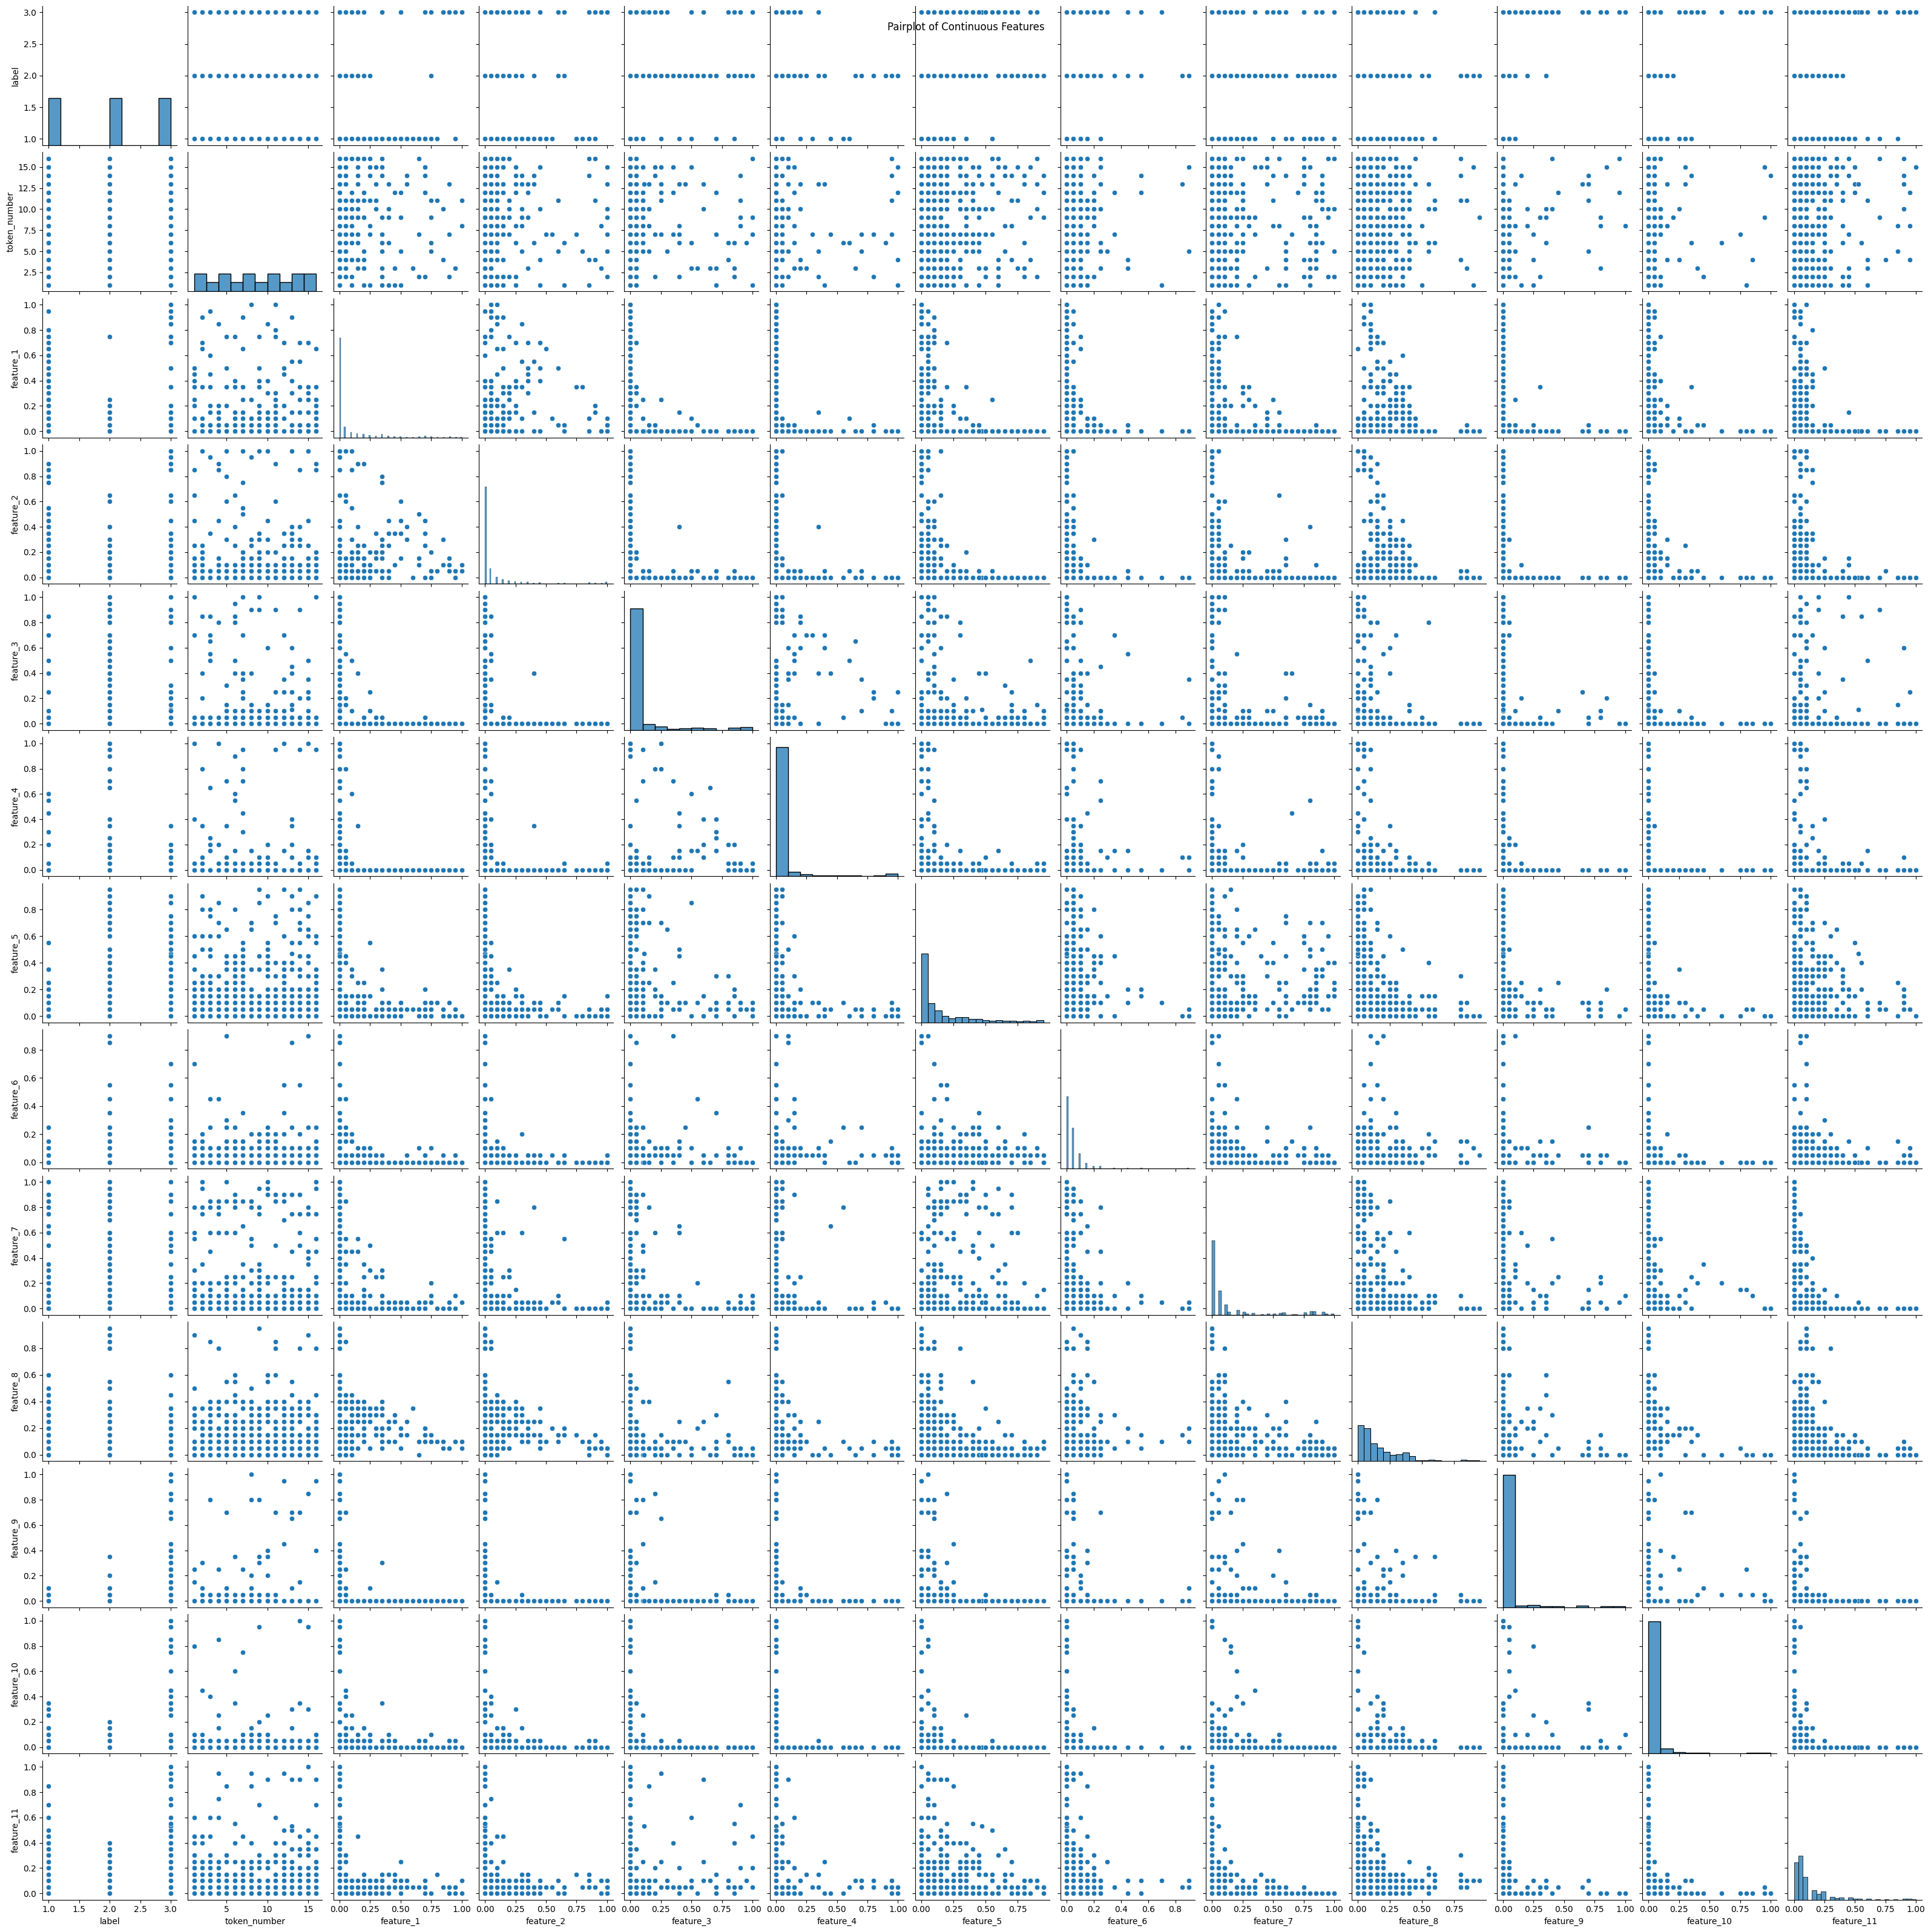

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Continuous Features')
plt.show()

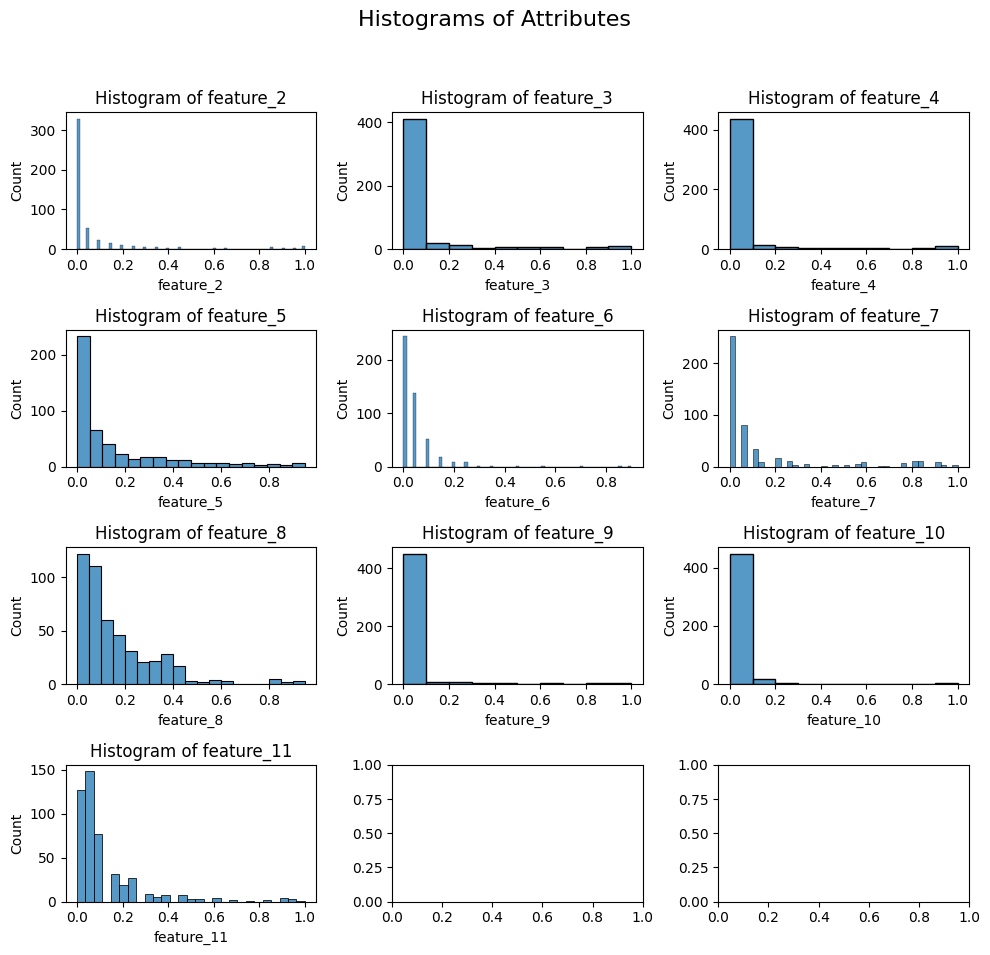

In [ ]:
attributes = df.columns[3:14]  # Get column names instead of indices
figure, axis = plt.subplots(4, 3, figsize=(10, 10))
figure.suptitle("Histograms of Attributes", fontsize=16)

for idx, column_name in enumerate(attributes):
    row = idx // 3
    col = idx % 3

    sns.histplot(df[column_name], ax=axis[row, col])  # Use column name
    axis[row, col].set_title(f'Histogram of {column_name}')  # Use column name

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
def boxplot_grid(data, columns):
    num_columns = 4
    num_rows = len(columns) // num_columns + (len(columns) % num_columns > 0)


    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))


    axes = axes.flatten()


    for i, column in enumerate(columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

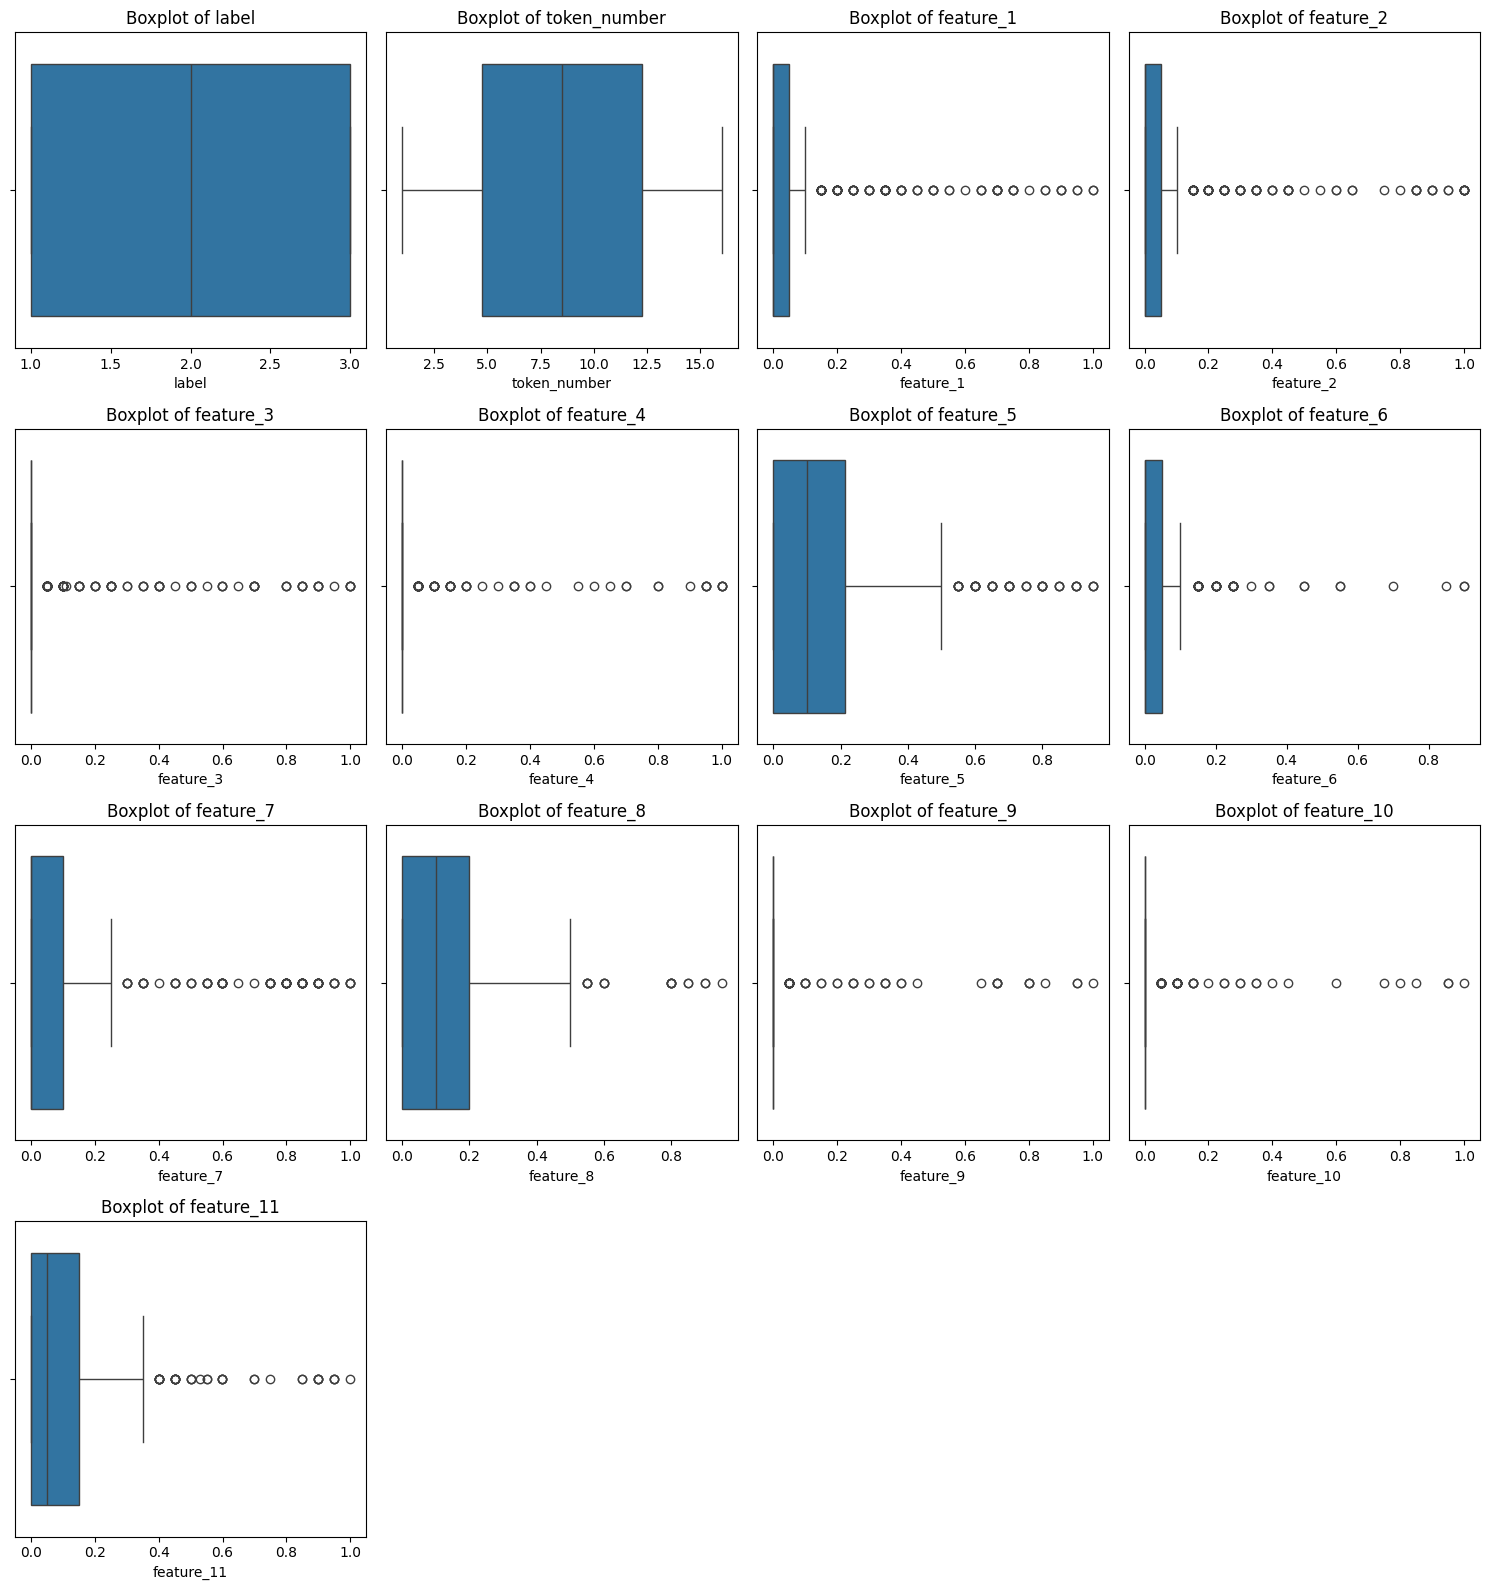

In [ ]:
boxplot_lambda = lambda data, columns: boxplot_grid(data, columns)
boxplot_lambda(df, continuous_features)

In [ ]:
def find_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)


    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers


continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns


outliers_dict = {}

for column in continuous_columns:
    outliers = find_outliers_iqr(df, column)
    if not outliers.empty:
        outliers_dict[column] = outliers


for col, outliers in outliers_dict.items():
    print(f"Outliers in '{col}':")
    print(outliers)
    print()




Outliers in 'feature_1':
0      0.20
1      0.65
2      0.60
4      0.35
5      0.40
       ... 
367    0.15
371    0.15
378    0.15
394    0.20
417    0.35
Name: feature_1, Length: 87, dtype: float64

Outliers in 'feature_2':
0      0.15
1      0.15
3      0.85
4      0.80
5      0.25
       ... 
378    0.90
380    1.00
381    0.85
382    1.00
383    0.85
Name: feature_2, Length: 77, dtype: float64

Outliers in 'feature_3':
85     0.05
86     0.40
103    0.10
105    0.10
106    0.05
       ... 
460    0.60
468    0.05
469    0.80
470    0.05
474    0.25
Name: feature_3, Length: 101, dtype: float64

Outliers in 'feature_4':
29     0.05
47     0.05
85     0.55
86     0.45
88     0.05
       ... 
405    0.05
450    0.15
453    0.05
454    0.05
460    0.10
Name: feature_4, Length: 69, dtype: float64

Outliers in 'feature_5':
109    0.55
177    0.60
186    0.70
206    0.85
260    0.65
263    0.70
265    0.90
268    0.90
269    0.95
270    0.60
271    0.60
288    0.60
305    0.80
306    0.8

In [ ]:
X = df.drop(df.columns[[0,1]],axis='columns')
y = df['label']

In [ ]:
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
475,3
476,3
477,3
478,3


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   480 non-null    float64
 1   feature_2   480 non-null    float64
 2   feature_3   480 non-null    float64
 3   feature_4   480 non-null    float64
 4   feature_5   480 non-null    float64
 5   feature_6   480 non-null    float64
 6   feature_7   480 non-null    float64
 7   feature_8   480 non-null    float64
 8   feature_9   480 non-null    float64
 9   feature_10  480 non-null    float64
 10  feature_11  480 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


In [ ]:
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

In [ ]:
X_transformed_df = pd.DataFrame(X_transformed,
                                columns=['feature1', 'feature2', 'feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11' ])

In [ ]:
continuous_features_new = [feature for feature in X_transformed_df.columns if X_transformed_df[feature].dtype != object]

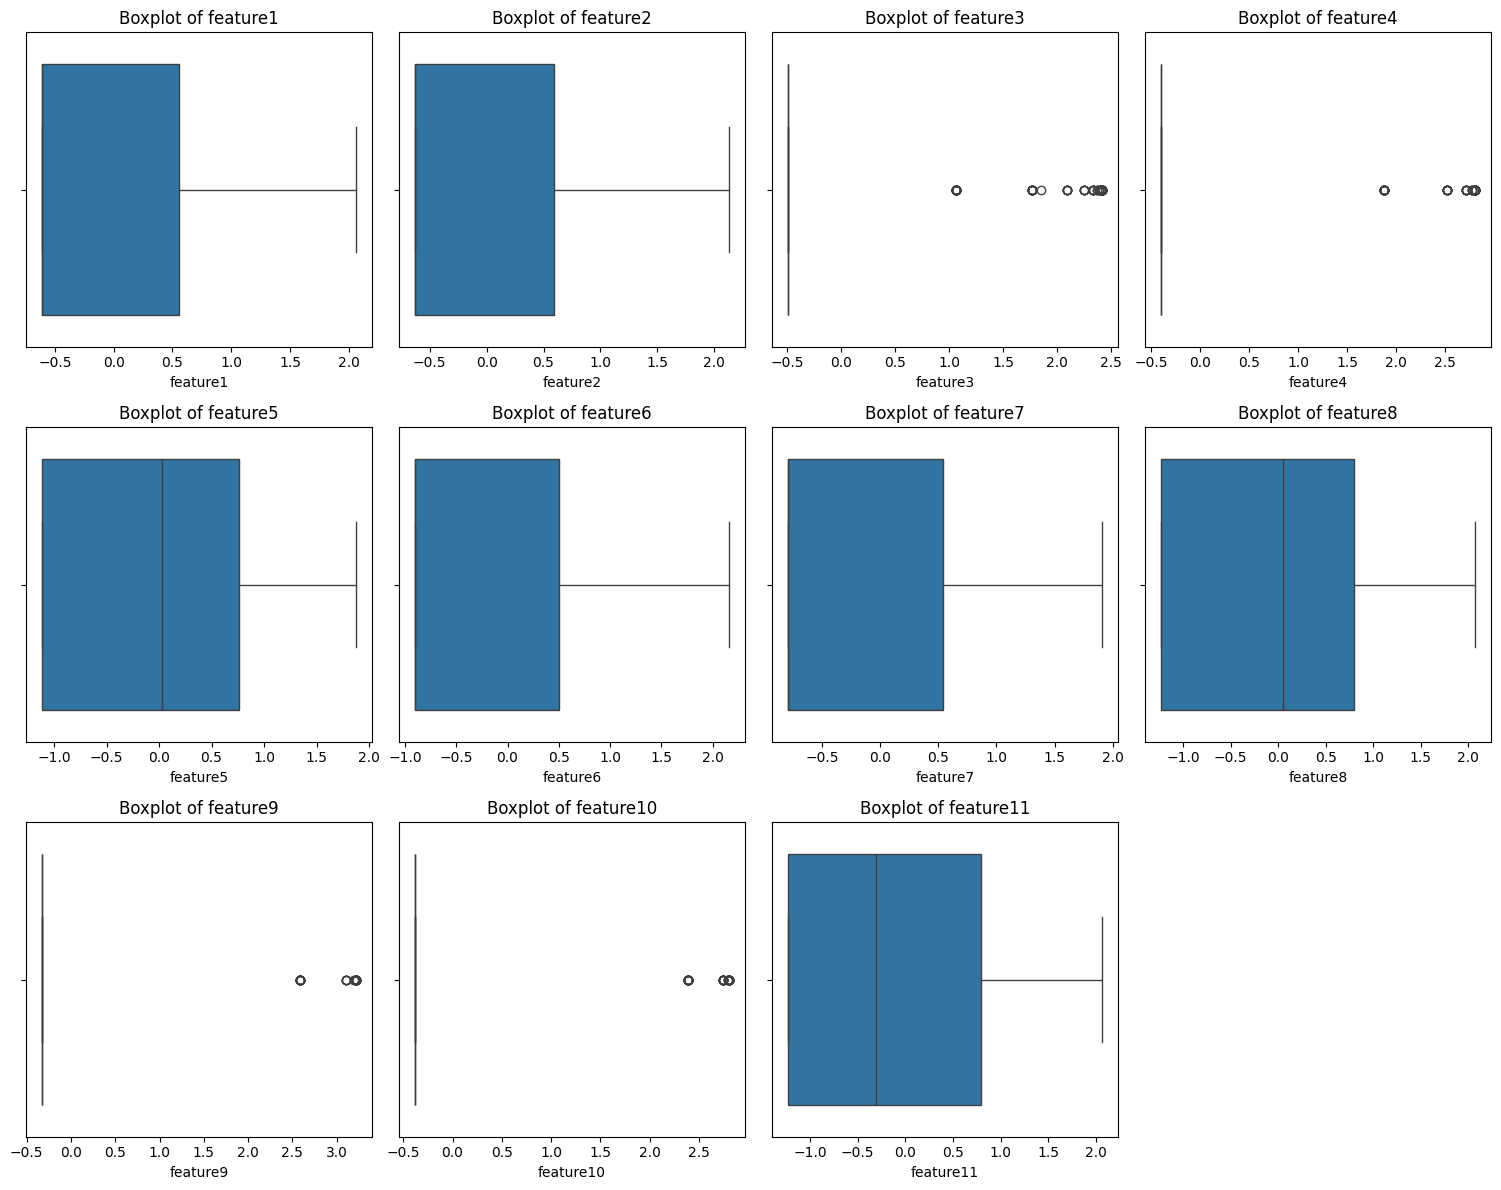

In [ ]:
boxplot_lambda = lambda data, columns: boxplot_grid(data, columns)
boxplot_lambda(X_transformed_df, continuous_features_new)

In [ ]:
transformed_df = pd.concat([df[['label','token_number']], X_transformed_df], axis=1)

In [ ]:
transformed_df.head()

,label,token_number,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
0,1,1,1.749037,1.612503,-0.497146,-0.404321,-1.117813,0.504722,-0.798091,1.257699,-0.331876,-0.384139,0.341500
1,1,2,2.057291,1.612503,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,0.050233,-0.331876,2.384846,-0.303165
2,1,3,2.054010,-0.633034,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,1.418220,-0.331876,-0.384139,-0.303165
3,1,4,1.188985,2.131594,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,0.341500
4,1,5,1.985458,2.130905,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,-0.303165


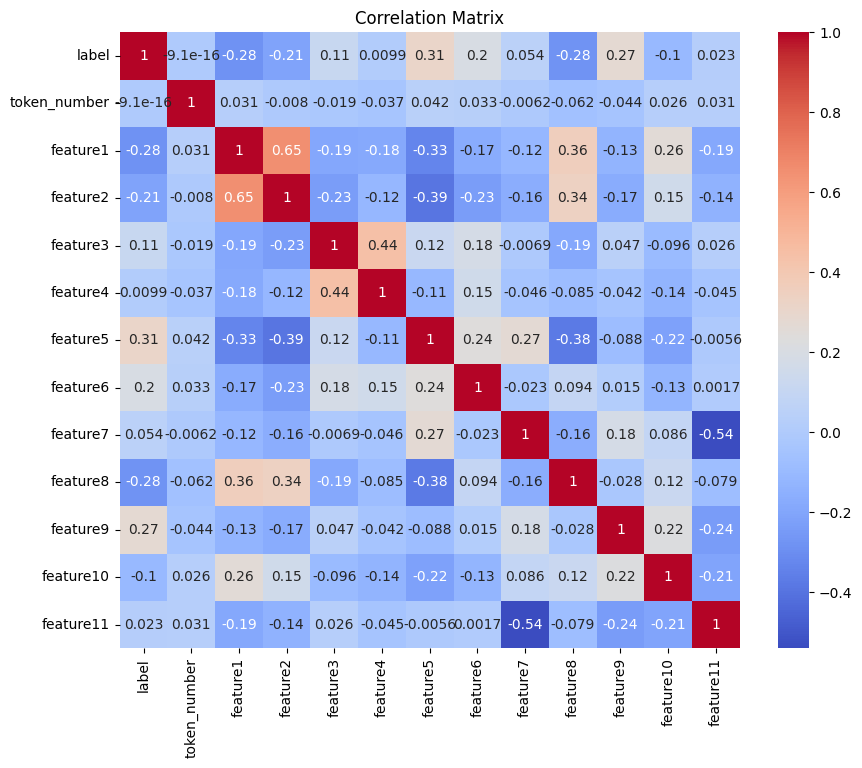

In [ ]:
numeric_df =transformed_df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This code splits the dataset into training (token numbers 1-10), validation (11-13), and testing (14-16) sets, ensuring each of the 30 rock subtypes is represented across these splits. It creates feature dataframes (`X_train_df`, `X_val_df`, `X_test_df`) by dropping the `label` column and extracts target arrays (`y_train`, `y_val`, `y_test`) from the `label` column for each subset. This setup ensures a clear separation between training, validation, and testing data for model development and evaluation.


In [ ]:
X_train_df = transformed_df[transformed_df['token_number'].between(1, 10)].copy()
X_val_df = transformed_df[transformed_df['token_number'].between(11,13)].copy()
X_test_df = transformed_df[transformed_df['token_number'].between(14,16)].copy()

In [ ]:
X_train_df.shape

(300, 13)

In [ ]:
X_train_df = X_train_df.drop('label', axis=1)
X_val_df = X_val_df.drop('label', axis=1)
X_test_df = X_test_df.drop('label', axis=1)
X_train_df = X_train_df.drop('token_number', axis=1)
X_val_df = X_val_df.drop('token_number', axis=1)
X_test_df = X_test_df.drop('token_number', axis=1)

In [ ]:
y_train = transformed_df[transformed_df['token_number'].between(1, 10)]['label'].values
y_val = transformed_df[transformed_df['token_number'].between(11, 13)]['label'].values
y_test = transformed_df[transformed_df['token_number'].between(14, 16)]['label'].values


In [ ]:
X_train_df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
0,1.749037,1.612503,-0.497146,-0.404321,-1.117813,0.504722,-0.798091,1.257699,-0.331876,-0.384139,0.341500
1,2.057291,1.612503,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,0.050233,-0.331876,2.384846,-0.303165
2,2.054010,-0.633034,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,1.418220,-0.331876,-0.384139,-0.303165
3,1.188985,2.131594,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,0.341500
4,1.985458,2.130905,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,-0.303165
5,2.013014,1.941026,-0.497146,-0.404321,-1.117813,-0.906308,-0.004209,1.056094,-0.331876,-0.384139,-0.303165
6,2.057291,2.111591,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,-0.303165
7,-0.612481,-0.633034,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.800565,-0.331876,-0.384139,1.119476
8,1.985458,2.012985,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,1.257699,-0.331876,-0.384139,-0.303165
9,1.941280,1.820117,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.473470,-0.331876,-0.384139,0.341500


In [ ]:
X_val_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
10,2.062119,0.588983,-0.497146,-0.404321,0.031771,-0.906308,-0.798091,0.050233,-0.331876,-0.384139,0.795217
11,2.041759,1.612503,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,0.800565,-0.331876,-0.384139,1.354489
12,1.941280,2.056679,-0.497146,-0.404321,-1.117813,0.504722,-0.798091,0.800565,-0.331876,-0.384139,-1.234642
26,-0.612481,-0.633034,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,-1.238712,-0.331876,-0.384139,1.354489
27,-0.612481,1.247489,-0.497146,-0.404321,-1.117813,0.504722,-0.798091,0.473470,-0.331876,-0.384139,1.119476


In [ ]:
X_test_df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
13,2.049126,2.083707,-0.497146,-0.404321,-0.463783,0.504722,-0.798091,1.056094,-0.331876,-0.384139,-0.303165
14,1.985458,1.612503,-0.497146,-0.404321,-1.117813,0.504722,-0.798091,1.547115,-0.331876,-0.384139,-0.303165
15,1.749037,2.132079,-0.497146,-0.404321,-1.117813,-0.906308,-0.798091,0.473470,-0.331876,-0.384139,-0.303165
29,-0.612481,-0.633034,-0.497146,1.869946,0.031771,-0.906308,-0.004209,-0.503874,-0.331876,-0.384139,1.119476
30,-0.612481,-0.633034,-0.497146,-0.404321,-0.463783,-0.906308,-0.798091,-1.238712,-0.331876,-0.384139,1.655232


A. **Multinomial Logistic Regression** The performance metrics for the Multinomial Logistic Regression show moderate accuracy across the training, validation, and test sets. The best hyperparameters identified using grid search were C=0.01, solver='lbfgs', and max_iter=100. The training accuracy of 63% indicates that the model has reasonable learning on the training data, while the validation (64.4%) and test (61.1%) accuracies suggest slight overfitting or limited generalization. Precision, recall, and F1 scores align with these findings, highlighting that tweaking regularization (C) and iterations can impact the balance between bias and variance.

# **Multinomial Logistic Regression**

In [ ]:
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Solvers for multinomial problems
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

Multinominal_Logistic_Regression_model = LogisticRegression(multi_class='multinomial')
Multinominal_Logistic_Regression_model_grid_search = GridSearchCV(Multinominal_Logistic_Regression_model, log_reg_param_grid, scoring='accuracy',cv=3)
Multinominal_Logistic_Regression_model_grid_search.fit(X_train_df, y_train)

best_log_reg = Multinominal_Logistic_Regression_model_grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", Multinominal_Logistic_Regression_model_grid_search.best_params_)

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}


In [ ]:
Multinominal_Logistic_Regression_model = LogisticRegression(multi_class='multinomial', C= 0.01, max_iter= 100, solver= 'lbfgs')

#Multinominal_Logistic_Regression_model.score(train_df, df['token_number'].iloc[train_rows])

In [ ]:
def evaluate_model(model, X, y_true, set_name="Set"):
    y_pred = model.predict(X)
    print(f"Performance on {set_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\n")




In [ ]:
Multinominal_Logistic_Regression_model.fit(X_train_df, y_train)


LogisticRegression(C=0.01, multi_class='multinomial')

In [ ]:
evaluate_model(Multinominal_Logistic_Regression_model, X_train_df, y_train, set_name="Training Set")


Performance on Training Set:
Accuracy: 0.6333333333333333
Precision: 0.6320372180587235
Recall: 0.6333333333333333
F1 Score: 0.6320971470879041




In [ ]:
evaluate_model(Multinominal_Logistic_Regression_model, X_val_df, y_val, set_name="Validation Set")


Performance on Validation Set:
Accuracy: 0.6444444444444445
Precision: 0.652922629153529
Recall: 0.6444444444444445
F1 Score: 0.6390228222436516




In [ ]:
evaluate_model(Multinominal_Logistic_Regression_model, X_test_df, y_test, set_name="Testing Set")

Performance on Testing Set:
Accuracy: 0.5888888888888889
Precision: 0.5864601348472316
Recall: 0.5888888888888889
F1 Score: 0.5863041026975453






---



# **SVM**

**B. Support Vector Machine (SVM)** The SVM model, tuned with C= 1, degree= 2, gamma= 'auto', kernel = 'poly', shows slightly better performance compared to the logistic regression, with training accuracy at 72% and validation and test accuracies around 72.2% and 65.5%, respectively.
CHANGE THIS
 This suggests that the polynomial kernel with these hyperparameters is moderately effective, but may struggle with complex relationships in the data. The precision, recall, and F1 scores reflect that SVM's performance is more sensitive to hyperparameters such as C (regularization) and kernel choice, which can significantly impact model complexity and decision boundaries.

In [ ]:
svm_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Solvers for multinomial problems
    'degree': [1,2,3,4],
    'gamma':['scale', 'auto']

}

SVM_model = SVC()
SVM_model_grid_search = GridSearchCV(SVM_model, svm_reg_param_grid, scoring='accuracy',cv=4)
SVM_model_grid_search.fit(X_train_df, y_train)

best_log_reg = SVM_model_grid_search.best_estimator_
print("Best Parameters for SVM:", SVM_model_grid_search.best_params_)

Best Parameters for SVM: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
SVM_model = SVC(C= 1, degree= 2, gamma= 'auto', kernel = 'poly')
SVM_model.fit(X_train_df, y_train)

SVC(C=1, degree=2, gamma='auto', kernel='poly')

In [ ]:
evaluate_model(SVM_model, X_train_df, y_train, set_name="Training Set")


Performance on Training Set:
Accuracy: 0.72
Precision: 0.7212851650079637
Recall: 0.72
F1 Score: 0.7189612731194882




In [ ]:
evaluate_model(SVM_model, X_val_df, y_val, set_name="Validation Set")


Performance on Validation Set:
Accuracy: 0.7222222222222222
Precision: 0.7281314699792961
Recall: 0.7222222222222222
F1 Score: 0.7193844905348252




In [ ]:
evaluate_model(SVM_model, X_test_df, y_test, set_name="Testing Set")

Performance on Testing Set:
Accuracy: 0.6555555555555556
Precision: 0.6666666666666666
Recall: 0.6555555555555556
F1 Score: 0.6452020202020202






---



# **Random Forest Classifier**

**C. Random Forest Classifier** The Random Forest classifier achieved the highest performance among the models, with training accuracy at 92% and validation and test accuracies around 75% and 65%. The best hyperparameters included criterion= 'gini', max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 10.** Change here**The model's high training accuracy indicates strong learning capacity, and the validation/test performance shows good generalization. Precision, recall, and F1 scores corroborate these findings, suggesting that hyperparameters like the number of trees (n_estimators) and tree depth (max_depth) are key in balancing learning capacity and avoiding overfitting. Additionally, analyzing feature importance from the Random Forest can provide insights into which features most influenced the predictions.

In [ ]:
rfc_reg_param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'n_estimators':[10, 50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model_grid_search = GridSearchCV(RandomForestClassifier_model, rfc_reg_param_grid, scoring='accuracy',cv=5)
RandomForestClassifier_model_grid_search.fit(X_train_df, y_train)

best_log_reg = RandomForestClassifier_model_grid_search.best_estimator_
print("Best Parameters for RandomForestClassifier:", RandomForestClassifier_model_grid_search.best_params_)

Best Parameters for RandomForestClassifier: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
RandomForestClassifier_model = RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 10)
RandomForestClassifier_model.fit(X_train_df, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=10)

In [ ]:
evaluate_model(RandomForestClassifier_model, X_train_df, y_train, set_name="Training Set")


Performance on Training Set:
Accuracy: 0.8933333333333333
Precision: 0.8935811948541793
Recall: 0.8933333333333333
F1 Score: 0.8934117292326247




In [ ]:
evaluate_model(RandomForestClassifier_model, X_val_df, y_val, set_name="Validation Set")


Performance on Validation Set:
Accuracy: 0.7444444444444445
Precision: 0.7415045200711191
Recall: 0.7444444444444445
F1 Score: 0.7411568292199425




In [ ]:
evaluate_model(RandomForestClassifier_model, X_test_df, y_test, set_name="Test Set")


Performance on Test Set:
Accuracy: 0.6777777777777778
Precision: 0.6775793650793651
Recall: 0.6777777777777778
F1 Score: 0.6771721666048696






---



# **SOFT VOTING**

To combine classifiers and improve performance on the validation set, different ensemble methods were tested: voting, AdaBoost, and stacking, using Logistic Regression, SVM, and Random Forest models.
 ### **Results Summary:**
 1. **Voting Classifier**: - 1.a. **Soft voting** gave a validation accuracy of 73.3% and an F1 score of 72.7%.

In [ ]:
from sklearn.ensemble import VotingClassifier


ensemble = VotingClassifier(
    estimators=[('svm', SVC(C= 1, degree= 2, gamma= 'auto', kernel = 'poly',probability=True)), ('rf', RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 10)), ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.01, max_iter= 100, solver= 'lbfgs'))], # Fixed estimator definitions, assuming model objects are defined
    voting='soft'
)
ensemble.fit(X_val_df, y_val)
#ensemble.fit(X_val_df, y_val)

VotingClassifier(estimators=[('svm',
                              SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_leaf=2,
                                                     n_estimators=10)),
                             ('mlr_model',
                              LogisticRegression(C=0.01,
                                                 multi_class='multinomial'))],
                 voting='soft')

In [ ]:
evaluate_model(ensemble, X_val_df, y_val, set_name="Validation Set")


Performance on Validation Set:
Accuracy: 0.9111111111111111
Precision: 0.9127979300393093
Recall: 0.9111111111111111
F1 Score: 0.9108136273536626




# **HARD VOTING**

1.b. **Hard voting** was less effective with 68.9% accuracy, showing that averaging predictions worked better than just taking the majority vote.

In [ ]:

ensemble = VotingClassifier(
    estimators=[('svm', SVC(C= 1, degree= 2, gamma= 'auto', kernel = 'poly',probability=True)), ('rf', RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 10)), ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.01, max_iter= 100, solver= 'lbfgs'))], # Fixed estimator definitions, assuming model objects are defined
    voting='hard'
)
ensemble.fit(X_val_df, y_val)


VotingClassifier(estimators=[('svm',
                              SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                  probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     min_samples_leaf=2,
                                                     n_estimators=10)),
                             ('mlr_model',
                              LogisticRegression(C=0.01,
                                                 multi_class='multinomial'))])

In [ ]:
evaluate_model(ensemble, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8666666666666667
Precision: 0.8752042483660131
Recall: 0.8666666666666667
F1 Score: 0.8659398645957785




# **Boosting**

**ADABOOST**

2. **AdaBoost Ensemble**: - **AdaBoost** with a Random Forest base performed best, reaching 96.67% accuracy on both validation and test sets. This method stood out because it focused on learning from mistakes, boosting overall accuracy and reliability. .

In [ ]:
adaboost_reg_param_grid = {
    'n_estimators':[10,50,100],
}

AdaBoostClassifier_model = AdaBoostClassifier(random_state=42)
AdaBoostClassifier_model_grid_search = GridSearchCV(AdaBoostClassifier_model, adaboost_reg_param_grid, scoring='accuracy',cv=2)
AdaBoostClassifier_model_grid_search.fit(X_train_df, y_train)

best_ada_reg = AdaBoostClassifier_model_grid_search.best_estimator_
print("Best Parameters for AdaBoostClassifier:", AdaBoostClassifier_model_grid_search.best_params_)

Best Parameters for AdaBoostClassifier: {'n_estimators': 100}


In [ ]:
ada_log_reg = AdaBoostClassifier(estimator=Multinominal_Logistic_Regression_model, n_estimators=100, random_state=42)
ada_svc = AdaBoostClassifier(estimator=SVC(C= 1, degree= 2, gamma= 'auto', kernel = 'poly',probability=True), n_estimators=100, random_state=42)
ada_rf = AdaBoostClassifier(estimator=RandomForestClassifier_model, n_estimators=100, random_state=42)




In [ ]:
ada_log_reg.fit(X_val_df, y_val)

AdaBoostClassifier(estimator=LogisticRegression(C=0.01,
                                                multi_class='multinomial'),
                   n_estimators=100, random_state=42)

In [ ]:

evaluate_model(ada_log_reg, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.6333333333333333
Precision: 0.6432900432900432
Recall: 0.6333333333333333
F1 Score: 0.6315018315018315




In [ ]:
ada_svc.fit(X_val_df, y_val)


AdaBoostClassifier(estimator=SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                 probability=True),
                   n_estimators=100, random_state=42)

In [ ]:
evaluate_model(ada_svc, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8444444444444444
Precision: 0.8525676937441643
Recall: 0.8444444444444444
F1 Score: 0.837628833584716




In [ ]:
ada_rf.fit(X_val_df, y_val)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                    min_samples_leaf=2,
                                                    n_estimators=10),
                   n_estimators=100, random_state=42)

In [ ]:
evaluate_model(ada_rf, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9777777777777777
Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1 Score: 0.9777777777777777




# **Stacking**

3. **Stacking Classifier**: - **Stacking** performed well, with the best configuration (Logistic Regression as the final model) achieving 75.6% validation accuracy. However, it didn’t beat AdaBoost, showing it might need more adjustments to perform at its best.

In [ ]:
base_models=[('svm', SVC(C= 1, degree= 2, gamma= 'auto', kernel = 'poly',probability=True)),
 ('rf', RandomForestClassifier(criterion= 'gini', max_depth= 30, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 10)),
  ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.01, max_iter= 100, solver= 'lbfgs'))]


In [ ]:
stacked_model_log = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
)
stacked_model_log.fit(X_val_df, y_val)

StackingClassifier(estimators=[('svm',
                                SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       min_samples_leaf=2,
                                                       n_estimators=10)),
                               ('mlr_model',
                                LogisticRegression(C=0.01,
                                                   multi_class='multinomial'))],
                   final_estimator=LogisticRegression(max_iter=200,
                                                      multi_class='multinomial'))

In [ ]:
evaluate_model(stacked_model_log, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9222222222222223
Precision: 0.9217896428130021
Recall: 0.9222222222222223
F1 Score: 0.9218363125559569




In [ ]:
stacked_model_svc = StackingClassifier(
    estimators=base_models,
    final_estimator=SVC(C= 0.01, degree= 2, gamma= 'scale', kernel = 'poly',probability=True)
)
stacked_model_svc.fit(X_val_df, y_val)

StackingClassifier(estimators=[('svm',
                                SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       min_samples_leaf=2,
                                                       n_estimators=10)),
                               ('mlr_model',
                                LogisticRegression(C=0.01,
                                                   multi_class='multinomial'))],
                   final_estimator=SVC(C=0.01, degree=2, kernel='poly',
                                       probability=True))

In [ ]:
evaluate_model(stacked_model_svc, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9111111111111111
Precision: 0.9111111111111111
Recall: 0.9111111111111111
F1 Score: 0.9111111111111111




In [ ]:
stacked_model_rfc = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(criterion= 'entropy', max_depth= 30, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
)
stacked_model_rfc.fit(X_val_df, y_val)

StackingClassifier(estimators=[('svm',
                                SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       min_samples_leaf=2,
                                                       n_estimators=10)),
                               ('mlr_model',
                                LogisticRegression(C=0.01,
                                                   multi_class='multinomial'))],
                   final_estimator=RandomForestClassifier(criterion='entropy',
                                                          max_depth=30,
                                                          min_samples_leaf=4,
                                                          min_samples_split=10))

In [ ]:
evaluate_model(stacked_model_rfc, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8
Precision: 0.8023689680214359
Recall: 0.8
F1 Score: 0.7993297155317672




# **USING STACKING WITH BOOSTING**

In [ ]:

stacked_model_gb = StackingClassifier(
    estimators=base_models,
    final_estimator=GradientBoostingClassifier(n_estimators=50, random_state=42)
)
stacked_model_gb.fit(X_val_df, y_val)

StackingClassifier(estimators=[('svm',
                                SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       min_samples_leaf=2,
                                                       n_estimators=10)),
                               ('mlr_model',
                                LogisticRegression(C=0.01,
                                                   multi_class='multinomial'))],
                   final_estimator=GradientBoostingClassifier(n_estimators=50,
                                                              random_state=42))

In [ ]:
evaluate_model(stacked_model_gb, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.7333333333333333
Precision: 0.7296146953405018
Recall: 0.7333333333333333
F1 Score: 0.7305333667325372




In [ ]:
stacked_model_ab = StackingClassifier(
    estimators=base_models,
    final_estimator=AdaBoostClassifier(n_estimators=50, random_state=42)
)
stacked_model_ab.fit(X_val_df, y_val)

StackingClassifier(estimators=[('svm',
                                SVC(C=1, degree=2, gamma='auto', kernel='poly',
                                    probability=True)),
                               ('rf',
                                RandomForestClassifier(max_depth=30,
                                                       min_samples_leaf=2,
                                                       n_estimators=10)),
                               ('mlr_model',
                                LogisticRegression(C=0.01,
                                                   multi_class='multinomial'))],
                   final_estimator=AdaBoostClassifier(random_state=42))

In [ ]:
evaluate_model(stacked_model_ab, X_val_df, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.5666666666666667
Precision: 0.5811287477954145
Recall: 0.5666666666666667
F1 Score: 0.5720756355965068




Among all the ensembles the one that performs the best on the validation set is adaboost, therefore we now fit the adaboostclassifier with estimator as RandomForestClassifier on the X_test_df and y_test and see how it performs.


### **Discussion:** The **AdaBoost ensemble** with Random Forest was the strongest performer, significantly better than individual models and other methods. Its way of learning from difficult cases improved accuracy and generalization on the test set. This highlights that trying different ensemble methods is worthwhile, as more advanced techniques like boosting can greatly enhance results

In [ ]:
evaluate_model(ada_rf, X_test_df, y_test, set_name="Test Set")

Performance on Test Set:
Accuracy: 0.9777777777777777
Precision: 0.9791666666666666
Recall: 0.9777777777777777
F1 Score: 0.9777530589543938




In [ ]:
model_probability = accuracy_score(ada_rf.predict(X_test_df), y_test)

In [ ]:
trail_df = pd.read_csv('/content/trialData.csv')

In [ ]:
trail_df.head()

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
0,A1HUMXQ7SEXD8E,1,1,331,Sedimentary,Bituminous Coal,11,NonparentTraining,Metamorphic,NaN,0,NaN
1,A1HUMXQ7SEXD8E,1,2,398,Sedimentary,Dolomite,14,NonparentTraining,Igneous,NaN,0,NaN
2,A1HUMXQ7SEXD8E,1,3,19,Igneous,Basalt,3,NonparentTraining,Sedimentary,NaN,0,NaN
3,A1HUMXQ7SEXD8E,1,4,338,Sedimentary,Breccia,2,NonparentTraining,Metamorphic,NaN,0,NaN
4,A1HUMXQ7SEXD8E,1,5,60,Igneous,Gabbro,12,NonparentTraining,Sedimentary,NaN,0,NaN


In [ ]:
trail_df = trail_df[trail_df['rocknumber'].between(1,480)]

In [ ]:
trail_df.shape

(83627, 12)

In [ ]:
train_trail_count = trail_df[trail_df['block'].between(1,3)]['cat_correct'].value_counts()

In [ ]:
train_trail_count

,count
cat_correct,
1,24790
0,19483


In [ ]:
total_train_values = train_trail_count.sum()

In [ ]:
train_trail_count.index

Index([1, 0], dtype='int64', name='cat_correct')

In [ ]:
train_trail_count[1]/total_train_values

0.5599349490660221

In [ ]:
test_trail_count = trail_df[trail_df['block']==4]['cat_correct'].value_counts()

In [ ]:
test_trail_count

,count
cat_correct,
1,23550
0,15804


In [ ]:
total_test_values = test_trail_count.sum()

In [ ]:
test_trail_count[1]/total_test_values

0.5984143924378716

In [ ]:
std_dev_human_accuracy = trail_df.groupby('rocknumber')['cat_correct'].std()
print(std_dev_human_accuracy)

rocknumber
1      0.435423
2      0.452002
3      0.500677
4      0.503077
5      0.502927
         ...   
476    0.494911
477    0.502478
478    0.497661
479    0.484633
480    0.495691
Name: cat_correct, Length: 480, dtype: float64


In [ ]:
mean_human_accuracy = trail_df.groupby('rocknumber')['cat_correct'].mean()
print(mean_human_accuracy)

rocknumber
1      0.746951
2      0.719512
3      0.451220
4      0.500000
5      0.512195
         ...   
476    0.576220
477    0.524390
478    0.426829
479    0.365854
480    0.414634
Name: cat_correct, Length: 480, dtype: float64


In [ ]:
trail_df.isna().sum()

,0
subid,0
block,0
trial,0
rocknumber,0
category,0
subtype,0
token,0
type,0
catresponse,0
recresponse,44273


In [ ]:
trail_df.dropna(inplace=True)

In [ ]:
trail_df.isna().sum()

,0
subid,0
block,0
trial,0
rocknumber,0
category,0
subtype,0
token,0
type,0
catresponse,0
recresponse,0


In [ ]:
trail_df.head(50)

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
540,A1HUMXQ7SEXD8E,4,541,341,Sedimentary,Breccia,5,StandardTransfer,Sedimentary,Yes,1,0.0
541,A1HUMXQ7SEXD8E,4,542,413,Sedimentary,Micrite,13,NonparentTraining,Sedimentary,Yes,1,1.0
542,A1HUMXQ7SEXD8E,4,543,162,Metamorphic,Amphibolite,2,NonparentTraining,Metamorphic,Yes,1,1.0
543,A1HUMXQ7SEXD8E,4,544,217,Metamorphic,Hornfels,9,StandardTransfer,Sedimentary,Yes,0,0.0
544,A1HUMXQ7SEXD8E,4,545,326,Sedimentary,Bituminous Coal,6,ParentTraining,Sedimentary,Yes,1,1.0
545,A1HUMXQ7SEXD8E,4,546,433,Sedimentary,Rock Salt,1,StandardTransfer,Metamorphic,No,0,1.0
546,A1HUMXQ7SEXD8E,4,547,57,Igneous,Gabbro,9,ParentTraining,Sedimentary,Yes,0,1.0
547,A1HUMXQ7SEXD8E,4,548,443,Sedimentary,Rock Salt,11,StandardTransfer,Igneous,No,0,1.0
548,A1HUMXQ7SEXD8E,4,549,344,Sedimentary,Breccia,8,ParentTraining,Igneous,Yes,0,1.0
549,A1HUMXQ7SEXD8E,4,550,170,Metamorphic,Amphibolite,10,StandardTransfer,Igneous,Yes,0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
trail_df['category'] = label_encoder.fit_transform(trail_df['category'])
trail_df['subtype'] = label_encoder.fit_transform(trail_df['subtype'])
trail_df['type'] = label_encoder.fit_transform(trail_df['type'])
trail_df['catresponse'] = label_encoder.fit_transform(trail_df['catresponse'])
trail_df['recresponse'] = label_encoder.fit_transform(trail_df['recresponse'])
trail_df['subid'] = label_encoder.fit_transform(trail_df['subid'])

In [ ]:
trail_df.head(50)

,subid,block,trial,rocknumber,category,subtype,token,type,catresponse,recresponse,cat_correct,rec_correct
540,7,4,541,341,2,5,5,2,2,1,1,0.0
541,7,4,542,413,2,15,13,0,2,1,1,1.0
542,7,4,543,162,1,0,2,0,1,1,1,1.0
543,7,4,544,217,1,13,9,2,2,1,0,0.0
544,7,4,545,326,2,4,6,1,2,1,1,1.0
545,7,4,546,433,2,25,1,2,1,0,0,1.0
546,7,4,547,57,0,10,9,1,2,1,0,1.0
547,7,4,548,443,2,25,11,2,0,0,0,1.0
548,7,4,549,344,2,5,8,1,0,1,0,1.0
549,7,4,550,170,1,0,10,2,0,1,0,0.0


In [ ]:
X = trail_df.drop(['category','catresponse'],axis=1)
y = trail_df['category']

In [ ]:
ada_rf.fit(X, y)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                    min_samples_leaf=2,
                                                    n_estimators=10),
                   n_estimators=100, random_state=42)

In [ ]:
predicted_labels= ada_rf.predict(X)

In [ ]:
predicted_labels

array([2, 2, 1, ..., 2, 2, 1])

In [ ]:
results_df = pd.DataFrame({
    'Rock number': trail_df['rocknumber'],
    'True Label': y,
    'Predicted Label': predicted_labels
})

In [ ]:
results_df['Correct Prediction'] = results_df['True Label'] == results_df['Predicted Label']


In [ ]:
accuracy_per_rock = results_df.groupby('Rock number')['Correct Prediction'].mean()


In [ ]:
print(accuracy_per_rock)

Rock number
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
476    1.0
477    1.0
478    1.0
479    1.0
480    1.0
Name: Correct Prediction, Length: 480, dtype: float64


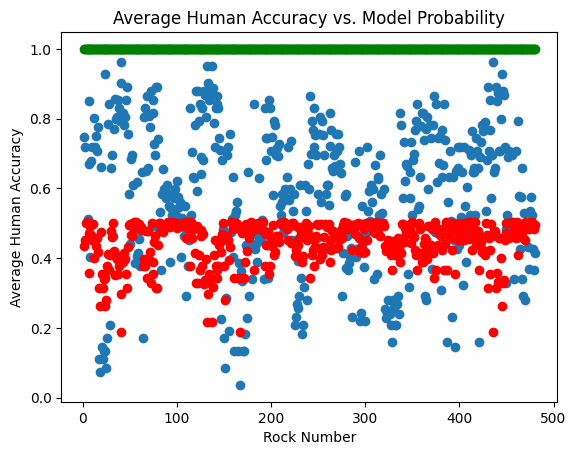

In [ ]:
plt.scatter(mean_human_accuracy.index,mean_human_accuracy)
plt.scatter(std_dev_human_accuracy.index,std_dev_human_accuracy,color='red')
plt.scatter(accuracy_per_rock.index,accuracy_per_rock,color='green')
plt.xlabel('Rock Number')
plt.ylabel('Average Human Accuracy')
plt.title('Average Human Accuracy vs. Model Probability')
plt.show()